<img src="./photo/2d64bf2071b7d919047d1f64df80b9c.png" width='20%'>

In [12]:
import numpy as np
#0-3随机取值
start = np.random.randint(3, size=1)
print(start)
start = start[0]

[0]


In [13]:
time_steps=np.linspace(start, start+10, 20)
print(time_steps)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


In [14]:
data = np.sin(time_steps)

In [15]:
data=data.reshape(20,1)
print(data)

[[ 0.        ]
 [ 0.50235115]
 [ 0.86872962]
 [ 0.99996678]
 [ 0.86054034]
 [ 0.48818921]
 [-0.01630136]
 [-0.5163796 ]
 [-0.87668803]
 [-0.99970104]
 [-0.85212237]
 [-0.47389753]
 [ 0.03259839]
 [ 0.53027082]
 [ 0.88441346]
 [ 0.99916962]
 [ 0.84347795]
 [ 0.4594799 ]
 [-0.04888676]
 [-0.54402111]]


In [16]:
import torch
x=torch.tensor(data[:-1]).float().view(1,19,1)
y=torch.tensor(data[1:]).float().view(1,19,1)
print(x)
print(y)

tensor([[[ 0.0000],
         [ 0.5024],
         [ 0.8687],
         [ 1.0000],
         [ 0.8605],
         [ 0.4882],
         [-0.0163],
         [-0.5164],
         [-0.8767],
         [-0.9997],
         [-0.8521],
         [-0.4739],
         [ 0.0326],
         [ 0.5303],
         [ 0.8844],
         [ 0.9992],
         [ 0.8435],
         [ 0.4595],
         [-0.0489]]])
tensor([[[ 0.5024],
         [ 0.8687],
         [ 1.0000],
         [ 0.8605],
         [ 0.4882],
         [-0.0163],
         [-0.5164],
         [-0.8767],
         [-0.9997],
         [-0.8521],
         [-0.4739],
         [ 0.0326],
         [ 0.5303],
         [ 0.8844],
         [ 0.9992],
         [ 0.8435],
         [ 0.4595],
         [-0.0489],
         [-0.5440]]])


In [17]:
"""_summary_

Returns:
    _type_: _description_
"""
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.rnn=torch.nn.RNN(1,10,2,batch_first=True)
        self.linear=torch.nn.Linear(10,1)
        
    def forward(self, x,hidden_prev):
        out,h = self.rnn(x,hidden_prev)
        #out:(batch_size,seq_len,hidden_size)->(batch_size*seq_len,hidden_size)
        out = out.view(-1,10)
        #out:(batch_size*seq_len,hidden_size)->(batch_size*seq_len,1)
        out = self.linear(out)
        out = out.view(1,x.shape[1],1)##(batch_size*seq_len,1)->(batch,seq_len,1)与y进行比较，y的维度是(batch,19,1)
        return out,h

In [18]:
from torch import optim
model=Net()
criterion=torch.nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.0009)

In [19]:
import tqdm
hidden_prev = torch.zeros(2,1,10)
for epoch in tqdm.tqdm(range(1000)):
    start = np.random.randint(10, size=1)[0]
    # start=0
    time_steps=np.linspace(start, start+10, 20)
    data = np.sin(time_steps)
    data=data.reshape(20,1)
    x=torch.tensor(data[:-1]).float().view(1,19,1)
    y=torch.tensor(data[1:]).float().view(1,19,1)
    out,h=model(x,hidden_prev)
    loss=criterion(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1)%100==0:
        print('Epoch:{},Loss:{:.5f}'.format(epoch+1,loss.item()))

 14%|█▍        | 138/1000 [00:00<00:02, 337.76it/s]

Epoch:100,Loss:0.20872


 24%|██▍       | 244/1000 [00:00<00:02, 312.59it/s]

Epoch:200,Loss:0.04131


 35%|███▍      | 347/1000 [00:01<00:02, 308.69it/s]

Epoch:300,Loss:0.03196


 45%|████▍     | 448/1000 [00:01<00:01, 314.27it/s]

Epoch:400,Loss:0.02733


 54%|█████▍    | 542/1000 [00:01<00:01, 278.89it/s]

Epoch:500,Loss:0.01362


 65%|██████▌   | 653/1000 [00:02<00:01, 306.86it/s]

Epoch:600,Loss:0.00628


 73%|███████▎  | 729/1000 [00:02<00:00, 329.57it/s]

Epoch:700,Loss:0.01462


 84%|████████▎ | 835/1000 [00:02<00:00, 342.96it/s]

Epoch:800,Loss:0.00840


 94%|█████████▍| 941/1000 [00:02<00:00, 327.94it/s]

Epoch:900,Loss:0.00114


100%|██████████| 1000/1000 [00:03<00:00, 318.89it/s]

Epoch:1000,Loss:0.00235


In [20]:
prediction= []
input=x[:,0,:]
for _ in range(19):
    input=input.view(1,1,1)
    (pred, hidden_prev) = model(input, hidden_prev)
    input = pred
    prediction.append(pred.squeeze().item())

In [21]:
print(prediction)
print(x.squeeze().tolist())

[-0.856978714466095, -0.7791039943695068, -0.4268551468849182, 0.03729294240474701, 0.5509819388389587, 0.9199844002723694, 1.0106585025787354, 0.8119049668312073, 0.42815274000167847, -0.048210740089416504, -0.5180776715278625, -0.848236620426178, -0.9216548800468445, -0.7309305667877197, -0.34564530849456787, 0.14864520728588104, 0.6443497538566589, 0.9766541123390198, 1.0068187713623047]
[-0.756802499294281, -0.9827382564544678, -0.9426737427711487, -0.647453248500824, -0.17698490619659424, 0.34138840436935425, 0.7673572301864624, 0.9856234788894653, 0.9371084570884705, 0.6349438428878784, 0.16091737151145935, -0.3566650450229645, -0.7777079939842224, -0.988246738910675, -0.9312941431999207, -0.6222657561302185, -0.14480707049369812, 0.37184691429138184, 0.7878521084785461]


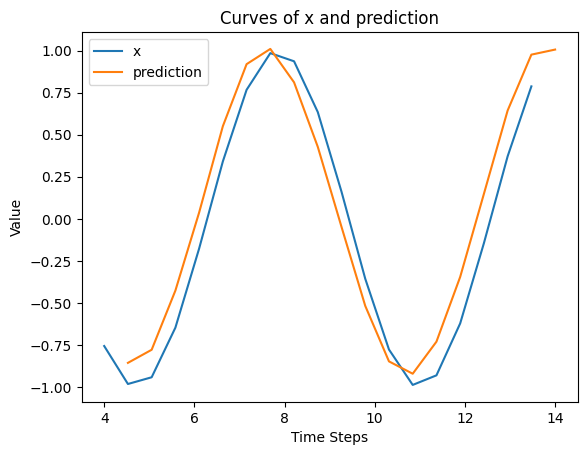

In [22]:
import matplotlib.pyplot as plt

# Convert tensors to numpy arrays
x_values = x.squeeze().tolist()
prediction_values = prediction

# Plot the curves
plt.plot(time_steps[:-1], x_values, label='x')
plt.plot(time_steps[1:], prediction_values, label='prediction')

# Add labels and title
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Curves of x and prediction')

# Add legend
plt.legend()

# Show the plot
plt.show()